In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [42]:
main_df = pd.DataFrame()

dataset = "COVID-19-geographic-disbtribution-worldwide-2020-12-14.csv"

df = pd.read_csv(dataset)

# just renaming the columns for when we merge the data, inplace so i dont have to redefine the df

# df.set_index("dateRep", inplace=True)
df = df[["dateRep", "cases", "deaths", "countriesAndTerritories", "continentExp"]]

df["dateRep"]= pd.to_datetime(df["dateRep"])

df_uk = df[df['countriesAndTerritories'] == 'United_Kingdom']
print(df_uk.head(10))

# print(df.head(20))

# now we merge the dataframes
if len(main_df) == 0:
    main_df = df
else:
    main_df = main_df.join(df)  # joining here

         dateRep  cases  deaths countriesAndTerritories continentExp
58378 2020-12-14  18447     144          United_Kingdom       Europe
58379 2020-12-13  21501     520          United_Kingdom       Europe
58380 2020-12-12  21672     424          United_Kingdom       Europe
58381 2020-12-11  20964     516          United_Kingdom       Europe
58382 2020-12-10  16578     533          United_Kingdom       Europe
58383 2020-12-09  12281     599          United_Kingdom       Europe
58384 2020-12-08  14718     189          United_Kingdom       Europe
58385 2020-12-07  17271     231          United_Kingdom       Europe
58386 2020-12-06  15539     397          United_Kingdom       Europe
58387 2020-12-05  16298     504          United_Kingdom       Europe


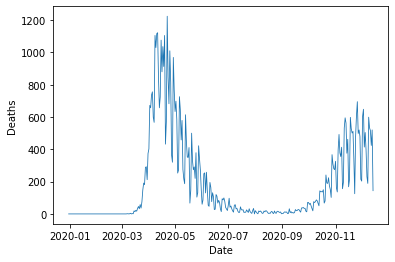

In [39]:
x = df_uk['dateRep']
y= df_uk['deaths']
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.plot(x,y, linewidth=0.8)

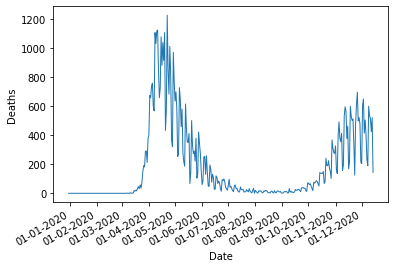

In [45]:
fig, ax = plt.subplots()
ax.plot('dateRep', 'deaths', data=df_uk, linewidth=1)
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Deaths')

plt.show()